# 在分类时间序列中查找周期性

说明如何对分类值时间序列数据执行频谱分析。当您对值本质上不是数值的数据的循环行为感兴趣时，分类值时间序列的谱分析很有用。
这些数据来自对新生儿睡眠状态的研究。一位儿科神经科医生每分钟对婴儿的脑电图 (EEG) 记录进行评分，持续大约两个小时。神经科医生将婴儿的睡眠状态分类为以下之一：

qt- 安静的睡眠，痕迹交替
qh- 安静的睡眠，高压
tr- 过渡睡眠
al- 主动睡眠，低电压
ah- 主动睡眠，高压
aw- 苏醒

Text(0, 0.5, 'Sleep State')

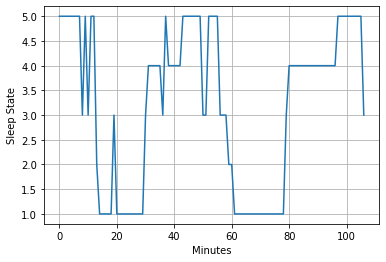

In [1]:
import matplotlib.pyplot as plt
import numpy as np
data= np.array(['ah','ah','ah','ah','ah','ah','ah','ah','tr','ah','tr','ah',
   'ah','qh','qt','qt','qt','qt','qt','tr','qt','qt','qt','qt','qt',
   'qt','qt','qt','qt','qt','tr','al','al','al','al','al','tr','ah',
   'al','al','al','al','al','ah','ah','ah','ah','ah','ah','ah','tr',
   'tr','ah','ah','ah','ah','tr','tr','tr','qh','qh','qt','qt','qt',
   'qt','qt','qt','qt','qt','qt','qt','qt','qt','qt','qt','qt','qt',
   'qt','qt','tr','al','al','al','al','al','al','al','al','al','al',
   'al','al','al','al','al','al','al','ah','ah','ah','ah','ah','ah',
   'ah','ah','ah','tr'])
# 特征编码
replace_num ={'qt':'1.0','qh':'2.0','tr':'3.0','al':'4.0','ah':'5.0','aw':'6.0'}
datasix=[replace_num[i] if i in replace_num else i for i in data]
datasix=np.array(datasix,dtype=np.float32)
plt.plot(datasix)
plt.grid()
plt.xlabel('Minutes')
plt.ylabel('Sleep State')


当关注最安静状态（1 和 2）和最活跃状态（4 和 5）之间的转换时，数据会表现出循环行为。要确定该行为的周期，使用频谱分析。睡眠状态是以一分钟的间隔分配的。以一分钟为间隔对数据进行采样相当于每小时对数据进行 60 次采样。

Text(0.5, 1.0, 'Periodogram of Sleep States')

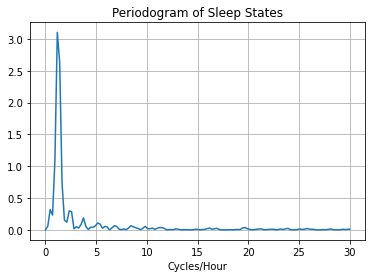

In [6]:
from scipy import signal
Fs = 60
[F,Pxx] = signal.periodogram(signal.detrend(datasix),Fs,nfft=256)
plt.plot(F,Pxx)
plt.grid()
plt.xlabel('Cycles/Hour')
plt.title('Periodogram of Sleep States')

光谱分析显示了一个清晰的峰值，表明数据中的主要振荡或循环。确定峰值的频率。

In [7]:
# 找出最大值所对应的频率
Pxx=Pxx.tolist()
print(F[Pxx.index(max(Pxx))])

1.171875


不是将睡眠状态分配为值 1 到 6，而是重复分析，仅关注安静睡眠和活动睡眠之间的区别。分配安静状态qt和qh，值 1。分配过渡状态，tr，值 2。最后，分配两个活动睡眠状态，al和ah，值 3。为了完整性，分配唤醒状态，aw值 4，甚至尽管状态不会出现在数据中

Text(0, 0.5, 'Sleep State')

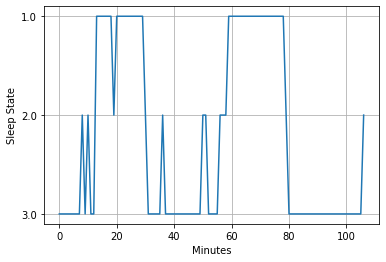

In [11]:
replace_num ={'qt':'1.0','qh':'1.0','tr':'2.0','al':'3.0','ah':'3.0','aw':'4.0'}
datafou=[replace_num[i] if i in replace_num else i for i in data]
plt.plot(datafou)
plt.grid()
plt.xlabel('Minutes')
plt.ylabel('Sleep State')

Text(0, 0.5, 'Sleep State')

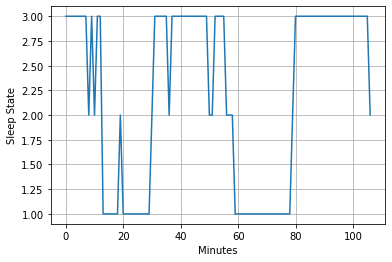

In [12]:
datafou=np.array(datafou,dtype=np.float32)
plt.plot(datafou)
plt.grid()
plt.xlabel('Minutes')
plt.ylabel('Sleep State')

上面两幅图y轴坐标 从上到下相反，关键原因是，数据类型不统一

使用睡眠状态和值 1 到 3 之间的这种分配规则，数据的循环行为更加清晰。使用新分配重复光谱分析。

Text(0.5, 1.0, 'Periodogram of Sleep States')

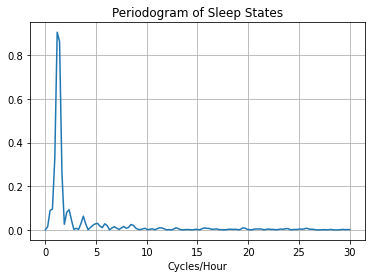

In [14]:
[F,Pxx] = signal.periodogram(signal.detrend(datafou),Fs,nfft=256)
plt.plot(F,Pxx)
plt.grid()
plt.xlabel('Cycles/Hour')
plt.title('Periodogram of Sleep States')

In [15]:
Pxx=Pxx.tolist()
print(F[Pxx.index(max(Pxx))])

1.171875
